# Exercise 1 : Comparing different estimators for the uniform model

## 1.

The expected value of $X_1$ is

$$\mathbb E_\theta[X_1] = \frac 1 \theta \int_{\R} \mathbb 1_{[0,\theta]}(x) \,dx = \frac \theta 2$$

Thus, we have the following estimator of $\theta$ via the methods of moments:

$$\hat \theta_1=\frac 2 n \sum_{i=1}^n X_i$$

## 2.

Using bias-variance decomposition, the quadratic risk of $\hat \theta_1$ is
$$
\begin{aligned}
R(\hat \theta_1)
&= \mathbb V(\hat\theta_1) + |\mathbb E[\hat\theta_1]-\theta|^2
\end{aligned}
$$
$\hat \theta_1$ is an unbiased estimator of $\theta$ and because the $X_i$ are i.i.d.,
$$
\begin{aligned}
V(\hat\theta_1)
&= \Big(\frac 2 n\Big)^2 \sum_{i=1}^n \mathbb V(X_i)\\
&=\frac 4 n \mathbb V(X_1)\\
&=\frac 4 n \frac{\theta^2}{12}
\end{aligned}
$$
Thus,
$$R(\hat \theta_1) = \frac{1}{3n}\theta^2$$

## 3.

The likelihood of $(X_1,...,X_n)$ with respect to some $\theta$ is

$$
\begin{aligned}
L_X(\theta)&=\prod_{i=1}^d \frac 1 \theta \mathbf 1_{[0,\theta]}(X_i)\\
&=\theta^{-n} \,\mathbf 1\{\max_{1\le i\le n} X_i \le \theta\}
\end{aligned}
$$
Thus, the maximum likelihood estimator is
$$\hat\theta_2=\max_{1\le i\le n}X_i\$$

## 4.

Under $\theta$, the cumulative distribution function of $\hat\theta_2$ is for all $t\ge 0$,
$$
\begin{aligned}
F_{\hat\theta_2}(t)
&=\mathbb P_\theta (\max_{1\le i\le n}X_i \le t)\\
&=\mathbb P_\theta (\forall 1\le i\le d,\,X_i \le t)\\
&=\prod_{i=1}^n \mathbb P_\theta(X_i \le t)\\
&=\mathbb P_\theta(X_1 \le t)^n\\
&=\begin{cases}
(t/\theta)^n & \text{if } t\le \theta\\
1 & \text{else.}
\end{cases}
\end{aligned}
$$
So $\hat\theta_2$ has probability density function
$$
f_{\hat\theta_2}(t)=\frac{n\,t^{n-1}}{\theta^n} \mathbf 1_{[0,\theta]}(t)
$$
And the quadratic risk of $\hat\theta_2$ is
$$
\begin{aligned}
R(\hat\theta_2)&=\mathbb E[|\hat\theta_2-\theta|^2]\\
&=\int_\R (t-\theta)^2\,f_{\hat\theta_2}(t)\,dt\\
&=\frac{2}{(n+1)(n+2)}\theta^2
\end{aligned}
$$

## 5.

For $n\ge 2$, we have
$$\frac 2 {(n+1)(n+2)}\le \frac 1 {3n}$$
Therefore, for all $\theta \ge 0$ and $n\ge 2$, the maximum likelihood estimator has a smaller quadratic risk that the estimator based on the method of moments, and thus is preferable.

# Exercise 3 : Learning a linear classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.

In [2]:
N = 1000

# We sample X from a normal distribution with mean MEAN
# and convariance matrix COV

MEAN = np.array([0.5, 0.0])
COV = np.array([[2.0, 0.5,],
                [0.5, 0.5]])

X = np.random.multivariate_normal(MEAN, COV, size=N)

true_W = np.array([-1.5, 1])

# Finally we compute Y = sign(XW)
Y = np.sign(X @ true_W)

We visualize our dataset.

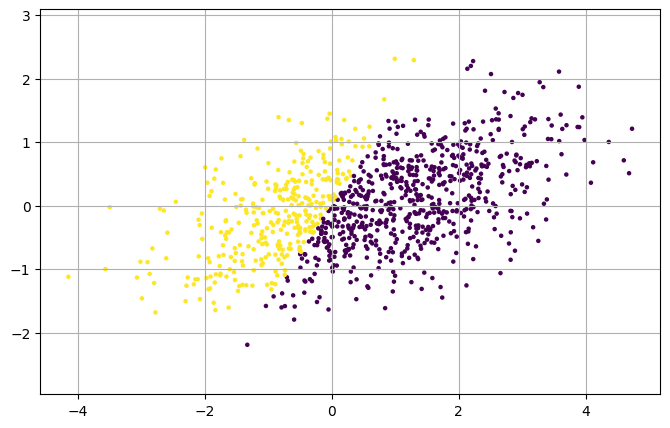

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X[:,0], X[:,1], s=5, c=Y)
ax.axis('equal')
plt.grid()

## 2.

**Stochastic Gradient Descent for minimizing $L_n(\tilde w)$ :**

* Initialize $\tilde w_0\in\R^{d+1}$ and let $(\varepsilon_i)_{i\ge 1}$ be a sequence of positive learning rates.
* For $i=1,...,n$:
    - Sample $(x_i,y_i)\sim \mathbb P$ independently from the past.
    - Compute the gradient $g_i=\nabla_{\tilde w_{i-1}} (h(\tilde x_i,\tilde w_{i-1})-y_i)^2 = 2 (\langle \tilde x_i, \tilde w_{i-1}\rangle-y_i)\,\tilde x_i$
    - Update $\tilde w_i = \tilde w_{i-1} - \varepsilon_i\,g_i$

Note here that we do not need a projection step $\tilde w_i=\text{proj}_K(\tilde w_{i-1} - \varepsilon_i\,g_i)$ because there is no constraints on $w$ which can be in all $\R^{d+1}$.

The random variables $(x_i,y_i)$ will precisely be the observations generated in q.1

## 3.

In [4]:
def stochastic_gradient_descent(X, Y, w_init, rates):

    # We check that X, Y, and the list of learning rates all have same length
    n, d = X.shape
    assert n == len(Y)
    assert n == len(rates)

    X_tilde = np.concatenate((X, np.ones((n,1))), axis=1)

    W = np.zeros((n+1, d+1))
    W[0] = w_init

    # Main loop
    for i in range(n):
        g = 2 * (W[i] @ X_tilde[i] - Y[i]) * X_tilde[i]
        W[i+1] = W[i] - rates[i] * g

    # We return the array of all values of w at all step
    return W

In [5]:
# We choose learning rates that decrease in 1/i
rates = np.array([1/i for i in range(1, N+1)])

# We also choose an initial w_0
w_init = np.array([0., 0., 0.])

W = stochastic_gradient_descent(X, Y, w_init, rates)

# w hat is then the last vector of W
estimated_w = W[-1,:]

print(f"w^* = {true_W}")
print(f"hat w = {estimated_w[0:2]}")
print(f"hat tau = {estimated_w[2]}")

w^* = [-1.5  1. ]
hat w = [-0.56624651  0.37539736]
hat tau = 0.00712183404886734


The vector $\hat w$ does not seem that close to $w^*$. Let us now plot the decision boundary of the classifier defined by $\hat w$ and compare it to the true decision boundary defined by $w^*$.

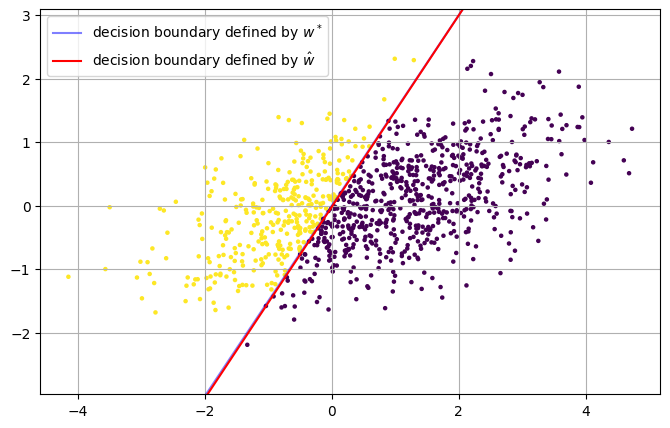

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot the points
ax.scatter(X[:,0], X[:,1], s=5, c=Y)

# Add the true decision boundary
slope = - true_W[0] / true_W[1]
ax.axline((0,0), slope=slope, color='blue', alpha=0.5, label=r'decision boundary defined by $w^*$')

# Add the decision boundary of our classifier
point = - estimated_w[2] / np.linalg.norm(estimated_w[0:2])**2 * estimated_w[0:2]
slope = - estimated_w[0] / estimated_w[1]
ax.axline(point, slope=slope, color='red', label=r'decision boundary defined by $\hat w$')

ax.axis('equal')
plt.legend()
plt.grid()

As we see, $\hat w$ and $w^*$ define a close separating hyperplane. However, the norm of $w^*$ has no impact on the way the points are classified, and thus cannot be estimated. If we normalize both $\hat w$ and $w^*$, we have

In [7]:
normalized_true_w = true_W / np.linalg.norm(true_W)
normalized_estimated_w = estimated_w[0:2] / np.linalg.norm(estimated_w[0:2])

print(f"normalized w^* = {normalized_true_w}")
print(f"normalized hat w = {normalized_estimated_w}")

normalized w^* = [-0.83205029  0.5547002 ]
normalized hat w = [-0.83347439  0.55255809]


Once normalized, $\hat w$ is close to $w^*$.

## 4.

In [8]:
noise_std = 0.5
noise = np.random.normal(size=(N,2), scale=noise_std)
Z = noise + X

Let us now visualize our noised dataset, with noise standard deviation equal to 0.5 

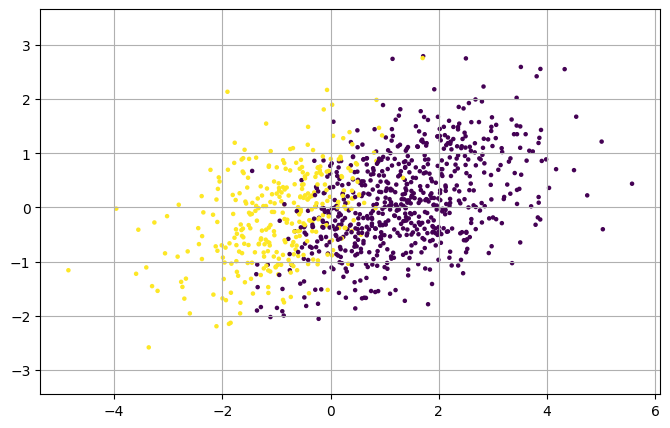

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(Z[:,0], Z[:,1], s=5, c=Y)
plt.axis('equal')
plt.grid()

In [10]:
rates = np.array([1/i for i in range(1, N+1)])
w_init = np.array([0., 0., 0.])
W = stochastic_gradient_descent(Z, Y, w_init, rates)
estimated_w = W[-1,:]

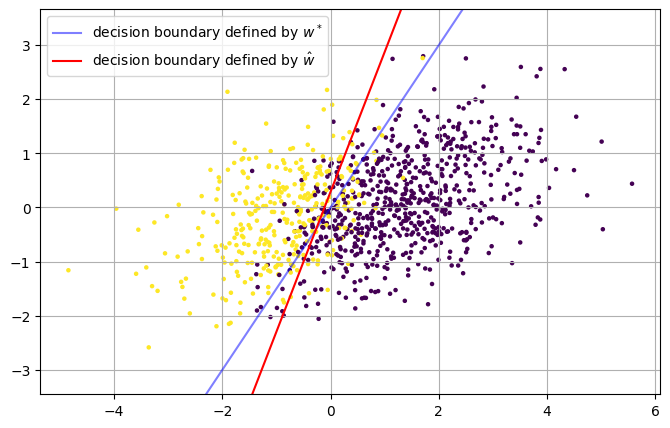

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot the points
ax.scatter(Z[:,0], Z[:,1], s=5, c=Y)

# Add the true decision boundary
slope = - true_W[0] / true_W[1]
ax.axline((0,0), slope=slope, color='blue', alpha=0.5, label=r'decision boundary defined by $w^*$')

# Add the decision boundary of our classifier
point = - estimated_w[2] / np.linalg.norm(estimated_w[0:2])**2 * estimated_w[0:2]
slope = - estimated_w[0] / estimated_w[1]
ax.axline(point, slope=slope, color='red', label=r'decision boundary defined by $\hat w$')

ax.axis('equal')
ax.legend()
ax.grid()

With noisy observations, the estimation $\hat w$ is further from the true $w^*$. Let us now look at the influence of the standard deviation over $\hat w$.

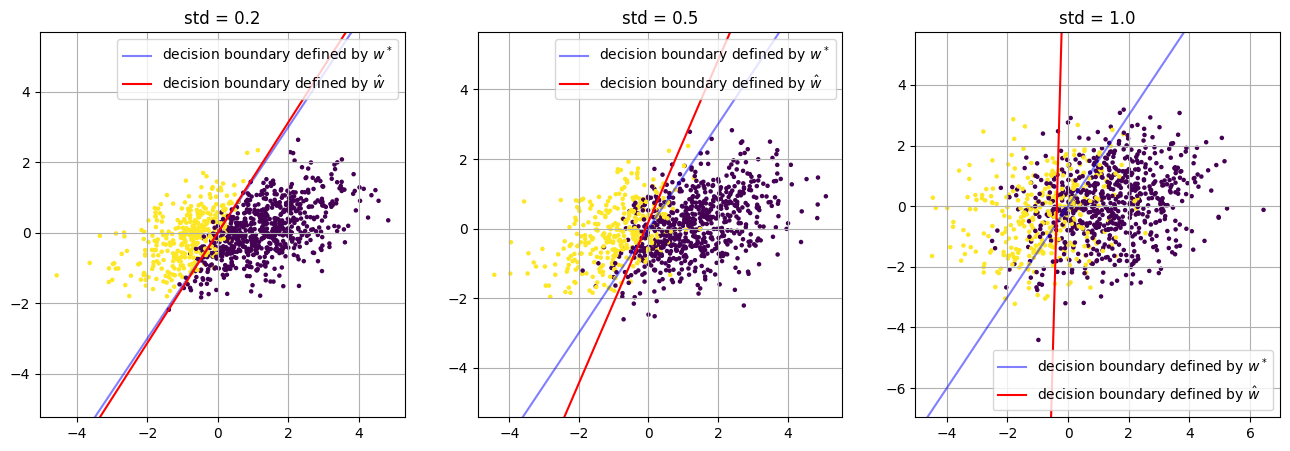

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

rates = np.array([1/i for i in range(1, N+1)])
w_init = np.array([0., 0., 0.])

for i, noise_std in enumerate([0.2, 0.5, 1.]):
    Z = np.random.normal(size=(N,2), scale=noise_std) + X

    W = stochastic_gradient_descent(Z, Y, w_init, rates)
    estimated_w = W[-1,:]

    # Plot the points
    ax[i].scatter(Z[:,0], Z[:,1], s=5, c=Y)

    # Add the true decision boundary
    slope = - true_W[0] / true_W[1]
    ax[i].axline((0,0), slope=slope, color='blue', alpha=0.5, label=r'decision boundary defined by $w^*$')

    # Add the decision boundary of our classifier
    point = - estimated_w[2] / np.linalg.norm(estimated_w[0:2])**2 * estimated_w[0:2]
    slope = - estimated_w[0] / estimated_w[1]
    ax[i].axline(point, slope=slope, color='red', label=r'decision boundary defined by $\hat w$')

    ax[i].axis('equal')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(f"std = {noise_std}")

The more noise we add on the observations, the further $\hat w$ is from the true $w^*$.

## 5.

In [13]:
from ucimlrepo import fetch_ucirepo 

In [14]:
# We fetch the datset as pandas datframe

heart_disease = fetch_ucirepo(id=45) 
X_dataframe = heart_disease.data.features 
y_dataframe = heart_disease.data.targets

# We then preprocess the data
# First, we delete rows with missing values
len_before = len(X_dataframe)
X_dataframe = X_dataframe.dropna()
print(f"We dropped {len_before-len(X_dataframe)} rows with missing values out of {len_before}")

# Then, we convert y to a numpy array, while taking care of rows we have deleted
y_dataframe = y_dataframe.iloc[X_dataframe.index]
y = y_dataframe.to_numpy().transpose()[0]

# Because we only care about binary classification here, and in line what is explained on the web page,
# We only try to distinguish presence (values 1, 2, 3, 4) from absence (value 0)
y = 2 * (y > 0).astype(int) - 1

# Finally, we convert X to a numpy array, and we normalize all features
X = X_dataframe.to_numpy()
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()

# We now have two numpy arrays, in the good format to apply Adaline
print("X.shape", X.shape)
print("y.shape", y.shape)

We dropped 6 rows with missing values out of 303
X.shape (297, 13)
y.shape (297,)


We now run SGD for several values of W_init, and several rates sequences, and only keep the estimated_w that leads to the best accuracy.


In [15]:
W_INITIAUX = np.random.normal(size=(1000, 14), scale=100)

RATES = np.array([
    [0.25 * i**-0.6 for i in range(1, len(X)+1)],
    [1 * i**-0.8 for i in range(1, len(X)+1)],
    [1* i**-1 for i in range(1, len(X)+1)],
])

best_estimated_w = np.zeros(14)
best_accuracy = 0.

X_tilde = np.concatenate((X, np.ones((len(X),1))), axis=1)

for w_init in W_INITIAUX:
    for rates in RATES:
        W = stochastic_gradient_descent(X, y, w_init, rates)
        estimated_w = W[-1,:]
        predicted_y = np.sign(X_tilde @ estimated_w)
        accuracy = np.mean(predicted_y == y)
        if accuracy > best_accuracy:
            best_estimated_w = estimated_w
            best_accuracy = accuracy

print("Best estimated w = ",best_estimated_w)

predicted_y = np.sign(X_tilde @ best_estimated_w)

print(f"Accuracy = {np.mean(predicted_y == y)}")
print(f"Precision = {np.sum((predicted_y == 1.) * (y == 1.)) / np.sum(predicted_y == 1.)}")
print(f"Recall = {np.sum((predicted_y == 1.) * (y == 1.)) / np.sum(y == 1.)}")

Best estimated w =  [-1.63475705  0.08038768 -1.10911064  0.31107346  1.53703938 -1.73493118
  1.11991969 -4.44454361 -0.72103337 -6.23256784  4.0173972   3.21101656
  3.70215393 -1.12341488]
Accuracy = 0.7239057239057239
Precision = 0.7235772357723578
Recall = 0.6496350364963503


Thus, we reach an accuracy of more that 70%.